In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from getConfig import getConfig
from getData import getData
from setPandasOptions import setPandasOptions
from checkMissing import checkMissing
from fbprophet import Prophet

In [2]:
setPandasOptions()
config = getConfig()

In [3]:
df = getData(config)
df.set_index(['Country', 'Program', 'Customer', 'Driver'], inplace=True)

In [8]:
def genTimeSeries(df):
    ts = df[["Month", "Amount"]]
    ts.reset_index(drop=True, inplace=True)
    
    ts.columns = ["ds", "y"]
    return ts

In [10]:
def fitModel(m, ts):
    return m.fit(ts)
    #future = model.make_future_dataframe(periods=366)
    #forecast = model.predict(future)

In [6]:
m = Prophet(changepoint_range=0.9, changepoint_prior_scale=0.001)

In [7]:
ok = 0
miss = 0
for key, val in df.groupby(level=[0,1,2,3]):
    missing_dates = checkMissing(val)
    if len(missing_dates) > 0:
        miss += 1
    else:
        ts = genTimeSeries(val)
        if ts.shape[0] > 18:
            model = fitModel(m, ts)
            #ok += 1
            break

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
ts.shape

(41, 2)

In [9]:
model.changepoints

1    2015-02-01
3    2015-04-01
4    2015-05-01
6    2015-07-01
7    2015-08-01
        ...    
29   2017-06-01
31   2017-08-01
32   2017-09-01
34   2017-11-01
35   2017-12-01
Name: ds, dtype: datetime64[ns]

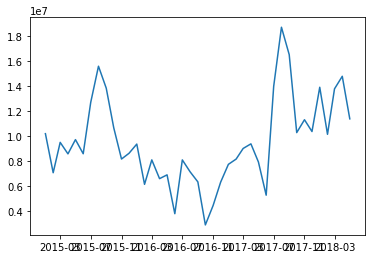

In [11]:
plt.plot(ts["ds"], ts["y"])

In [21]:
import pandas.util.testing as tm
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.pyplot import figure

In [49]:
tm.N, tm.K = 20,1

df = tm.makeTimeDataFrame(freq="D")
df.reset_index(inplace=True)
df.columns=["Month", "Amount"]

In [51]:
df[:10]

,Month,Amount
0,2000-01-01,0.039
1,2000-01-02,-0.346
2,2000-01-03,0.514
3,2000-01-04,0.357
4,2000-01-05,-1.088
5,2000-01-06,0.521
6,2000-01-07,0.714
7,2000-01-08,-2.096
8,2000-01-09,0.734
9,2000-01-10,0.143


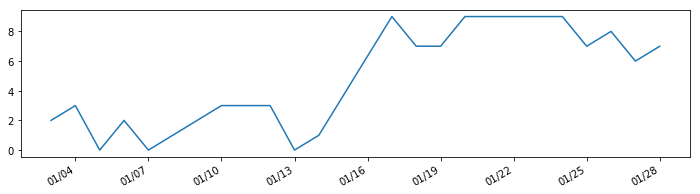

In [39]:
first10 = np.array(np.random.randint(low=0,high=4, size=10))
second10 = np.array(np.random.randint(low=6,high=10, size=10))

df["Amount"][:10] = first10
df["Amount"][10:] = second10


fig, ax = plt.subplots(figsize=(12, 3))


#plt.figure(figsize=(12,3))
plt.plot(df["Month"], df["Amount"])
myFmt = DateFormatter("%m/%d")
ax.xaxis.set_major_formatter(myFmt)
## Rotate date labels automatically
fig.autofmt_xdate()
plt.show()

In [44]:
df[:7]

,Month,Amount
0,2000-01-03,2.0
1,2000-01-04,3.0
2,2000-01-05,0.0
3,2000-01-06,2.0
4,2000-01-07,0.0
5,2000-01-10,3.0
6,2000-01-11,3.0


In [11]:
ts = genTimeSeries(df)

m = Prophet(changepoint_range=0.9, n_changepoints=3)
model = fitModel(m, ts)

points = model.changepoints
deltas = model.params["delta"]
deltas = np.reshape(deltas, [-1,])
norm = deltas / np.linalg.norm(deltas)
tom = zip(points, norm)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


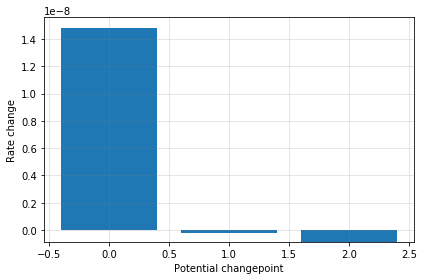

In [12]:
deltas = model.params['delta'].mean(0)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

In [13]:
for x in tom:
    print(x)

(Timestamp('2000-01-11 00:00:00'), 0.9982365120129056)
(Timestamp('2000-01-18 00:00:00'), -0.013306002099344115)
(Timestamp('2000-01-26 00:00:00'), -0.057851675796300926)


In [15]:
df[3:13]

,Month,Amount
3,2000-01-06,0.0
4,2000-01-07,2.0
5,2000-01-10,2.0
6,2000-01-11,2.0
7,2000-01-12,3.0
8,2000-01-13,3.0
9,2000-01-14,3.0
10,2000-01-17,9.0
11,2000-01-18,9.0
12,2000-01-19,7.0
